In [3]:
import re

In [4]:
paragraph = "The weather today is really really nice, and everyone everyone seems happy!! I went to the park park to relax and read a book book under the tree. It was so peaceful peaceful that I almost fell asleep asleep!"

In [5]:
def cleaned_text(text):
  text = re.sub("[^a-zA-Z0-9 ]", "", text)
  text = text.lower().split()

  vocab = []
  for word in text:
    if word not in vocab:
      vocab.append(word)

  vocab.sort()
  return vocab

In [6]:
text = cleaned_text(paragraph)
text

['a',
 'almost',
 'and',
 'asleep',
 'book',
 'everyone',
 'fell',
 'happy',
 'i',
 'is',
 'it',
 'nice',
 'park',
 'peaceful',
 'read',
 'really',
 'relax',
 'seems',
 'so',
 'that',
 'the',
 'to',
 'today',
 'tree',
 'under',
 'was',
 'weather',
 'went']

**1. ONE HOT ENCODING**

In [2]:
import numpy as np

In [39]:
array = np.zeros((len(text), len(text)))
array.shape

(28, 28)

In [40]:
for i in range(len(text)):
  for j in range(len(text)):
    if i == j:
      array[i, j] = 1

In [41]:
print(array)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0

**2. WORD EMBEDDINGS**

In [42]:
# !pip install gensim

In [48]:
import gensim.downloader as api

# Automatically downloads and loads the full pretrained model (~1.6 GB)
model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [49]:
!gunzip /root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz

In [8]:
from gensim.models import KeyedVectors

filename = '/root/gensim-data/word2vec-google-news-300/word2vec-google-news-300'
w2vec = KeyedVectors.load_word2vec_format(filename, binary=True)

array = np.zeros((len(text), 300))
for i, j in enumerate(text):
  if j in w2vec.key_to_index:
    array[i, :] = w2vec[j]
  else:
    array[i, :] = np.zeros(300)

In [9]:
array

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.18652344, -0.14941406,  0.05883789, ...,  0.05957031,
         0.06884766,  0.04516602],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.02600098, -0.00189209,  0.18554688, ..., -0.12158203,
         0.22167969, -0.02197266],
       [-0.18652344,  0.16796875, -0.30273438, ...,  0.25      ,
         0.41210938,  0.02429199],
       [ 0.08642578,  0.2578125 ,  0.02807617, ..., -0.27148438,
         0.17285156,  0.04223633]])

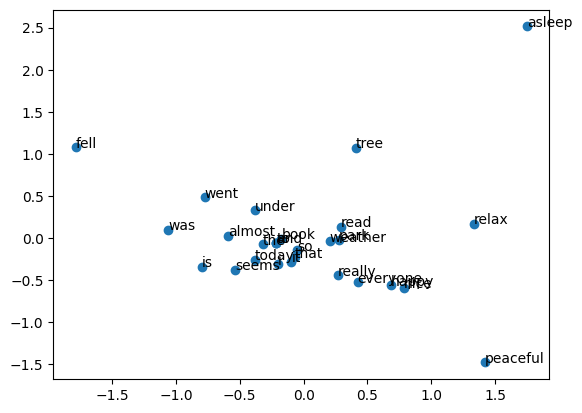

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(array)

plt.scatter(reduced[:,0], reduced[:,1])
for i, word in enumerate(text):
    plt.annotate(word, (reduced[i,0], reduced[i,1]))
plt.show()
